### In this notebook I want to run the KNN algorithm for Iris dataset with k=[1,3,5,7,9,11,13], plot the accuracy and calculate confusion matrix.

#### import libraries

In [1]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
import numpy as np

#### load dataset

In [2]:
data = load_iris()

In [3]:
X = data.data
Y = data.target

#### split dataset to train and test

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=20)
# another way to split the data to test and test is using numpy library and mask the data.

### Train/Test

In [5]:
K = [1,3,5,7,9,11,13]
evalList = []
for k in K:
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train, Y_train)
    pred = neigh.predict(X_test)
    eval = (pred == Y_test).sum()/len(Y_test)
    evalList.append(eval)

#### plot accuracies 

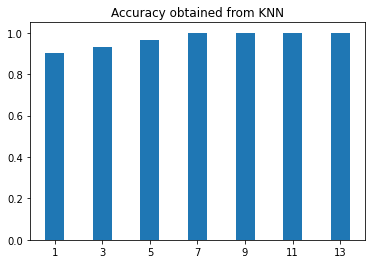

In [6]:
plt.bar(K, evalList)
plt.title('Accuracy obtained from KNN')
plt.xticks(ticks=K)
plt.show()

In [7]:
# pred is the predict list with k=13
conf_mat = confusion_matrix(Y_test, pred)

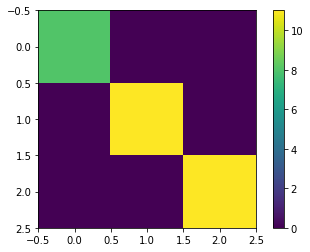

In [8]:
plt.imshow(conf_mat)
plt.colorbar()
plt.grid(False)
plt.show()

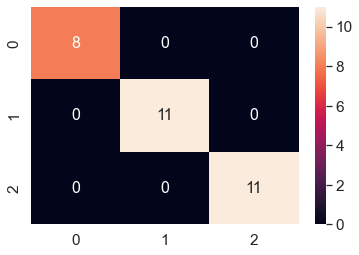

In [9]:
sn.set(font_scale=1.4) # for label size
sn.heatmap(conf_mat, annot=True, annot_kws={"size": 16})
plt.show()

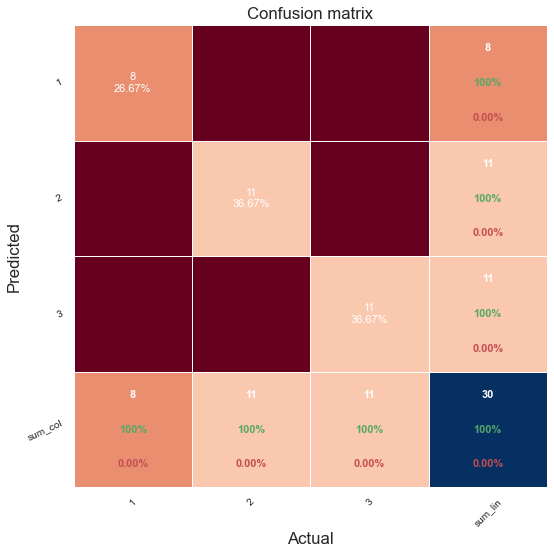

In [15]:
from pretty_confusion_matrix import pp_matrix

cmap = 'RdBu'
df_cm = pd.DataFrame(conf_mat, index=range(1, 4), columns=range(1, 4))
pp_matrix(df_cm, cmap=cmap)